In [1]:
# API KEY Loading
from dotenv import load_dotenv
""
load_dotenv()

True

In [2]:
from langchain_teddynote import logging

logging.langsmith("CH21-LangGraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH21-LangGraph


# LangGraph Chatbot 개발 

## Step-1. State 정의 

In [15]:
!pip install grandalf

In [3]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END 
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

## Step-2. Node 정의 

In [5]:
from langchain_openai import ChatOpenAI

In [6]:
# LLM 정의
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

In [7]:
# 챗봇 함수 정의 
def chatbot(state: State):
    return {
        "messages": [llm.invoke(state['messages'])]
    }

## Step-3. Graph 정의

In [8]:
# 그래프 정의 
graph_builder = StateGraph(State)

# 노드 추가 
graph_builder.add_node("chatbot", chatbot)

## Step-4. Edge 추가 

In [9]:
# 시작점 정의 
graph_builder.add_edge(START, "chatbot")

In [10]:
## 종료지점 정의 
graph_builder.add_edge("chatbot", END)

## Step-5. Graph Compile

In [11]:
graph = graph_builder.compile()

## Step-6. Graph Visualizaion

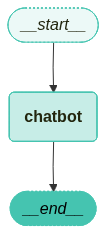

In [17]:
from langchain_teddynote.graphs import visualize_graph
import grandalf

visualize_graph(graph)

In [19]:
print(graph.get_graph().draw_ascii())

ImportError: Install grandalf to draw graphs: `pip install grandalf`.

## Step-7. 실행

In [20]:
question = "서울 맛집 TOP 10 알려주세요"

In [21]:
for event in graph.stream({"messages": [("user", question)]}):
    for value in event.values():
        print("Assistant: ", value["messages"][-1].content)

Assistant:  서울에는 다양한 맛집이 많아서 선택하기가 어렵지만, 다음은 서울에서 인기 있는 맛집 TOP 10을 소개합니다. 이 리스트는 다양한 종류의 음식을 포함하고 있습니다.

1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.

2. **부암동 카페거리** - 예쁜 카페와 함께 다양한 디저트를 제공하는 곳으로, 특히 커피와 디저트가 유명합니다.

3. **이태원 앤틱 가구 거리** - 다양한 국제 음식을 즐길 수 있는 곳으로, 특히 멕시코, 인도, 중동 음식이 인기입니다.

4. **명동 교자** - 칼국수와 만두가 유명한 맛집으로, 항상 많은 사람들이 찾는 곳입니다.

5. **삼청동 수제비** - 수제비와 전통 한식을 즐길 수 있는 아늑한 분위기의 식당입니다.

6. **신사동 가로수길** - 다양한 트렌디한 레스토랑과 카페가 모여 있는 곳으로, 특히 브런치와 디저트가 인기입니다.

7. **종로 통인시장** - 다양한 전통 음식을 맛볼 수 있는 시장으로, 특히 김밥과 떡볶이가 유명합니다.

8. **홍대** - 다양한 음식점과 카페가 밀집해 있는 지역으로, 특히 젊은 층에게 인기 있는 맛집이 많습니다.

9. **압구정 로데오 거리** - 고급 레스토랑과 카페가 많은 지역으로, 다양한 세계 음식을 즐길 수 있습니다.

10. **강남역** - 다양한 패스트푸드와 한식, 중식, 일식 등 다양한 음식을 제공하는 맛집이 많습니다.

각 지역마다 특색 있는 맛집이 많으니, 방문하실 때 참고하시기 바랍니다!


-----
** End of Documents **